<a href="https://colab.research.google.com/github/diecilyngonzales/Lab-Activities-for-Linear-Algebra-58051/blob/main/Finals_Examination_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [REAL LIFE APPLICATIONS OF LINEAR ALGEBRA UNDER MATRIX MULTIPLICATIONS](https://www.researchgate.net/publication/350314436_REAL_LIFE_APPLICATIONS_OF_LINEAR_ALGEBRA_UNDER_MATRIX_MULTIPLICATIONS)

The research discusses how linear algebra and matrix multiplication can/is used in the field of computer graphics. 

The first implementation on this notebook attempts to implement the same problems in the research paper using Python - by coding the same steps made by the researchers.

The second implementation will attempt to improve the results of the researchers.

In [ ]:
#first implementation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>First Implementation</h1>

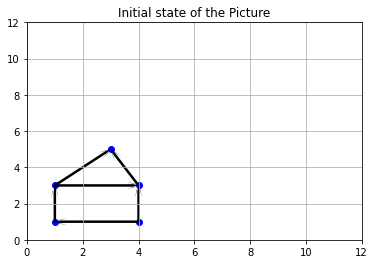

In [ ]:
#Initial State of the picture

def connect_plot(array1, array2, line_color='black'):
    plt.quiver(array1[0], array1[1], array2[0] - array1[0], array2[1] - array1[1], scale_units='xy', angles='xy', color=line_color, scale=1, headaxislength=1)

initial = np.array([
                    [3, 5],
                    [1, 3],
                    [4, 3],
                    [1, 1],
                    [4, 1]
])

plt.xlim(0, 12)
plt.ylim(0, 12)

for i in range(initial.shape[0]):
  plt.scatter(initial[i,0], initial[i,1], color='blue')

connect_plot(initial[1], initial[0])
connect_plot(initial[2], initial[0])
connect_plot(initial[1], initial[2])
connect_plot(initial[3], initial[1])
connect_plot(initial[4], initial[2])
connect_plot(initial[4], initial[3])

plt.title("Initial state of the Picture")
plt.grid()
plt.show()

<h2>Problem 1:</h2>

Alter the size of the given image by using scaling process.

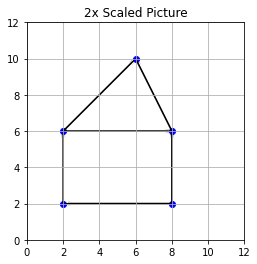

In [ ]:
#Problem 1 - Scaling

scale = np.array([
                  [2, 0],
                  [0, 2]
])

scaled_picture = initial @ scale

plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")

for i in range(scaled_picture.shape[0]):
  plt.scatter(scaled_picture[i,0], scaled_picture[i,1], color='blue')

connect_plot(scaled_picture[1], scaled_picture[0])
connect_plot(scaled_picture[2], scaled_picture[0])
connect_plot(scaled_picture[1], scaled_picture[2])
connect_plot(scaled_picture[3], scaled_picture[1])
connect_plot(scaled_picture[4], scaled_picture[2])
connect_plot(scaled_picture[4], scaled_picture[3])

plt.title("2x Scaled Picture")
plt.grid()
plt.show()

During the first problem, it is observed that the implementation of the picture on the graph can be simplified in order to minimize the number of lines to present the code

In [ ]:
#created a user function to prevent repetitive coding in the succeeding problems
def draw_picture(super_array, dot_color='blue', line_color='black'):
    for i in range(super_array.shape[0]):
      plt.scatter(super_array[i,0], super_array[i,1], color=dot_color)

    connect_plot(super_array[1], super_array[0], line_color)
    connect_plot(super_array[2], super_array[0], line_color)
    connect_plot(super_array[1], super_array[2], line_color)
    connect_plot(super_array[3], super_array[1], line_color)
    connect_plot(super_array[4], super_array[2], line_color)
    connect_plot(super_array[4], super_array[3], line_color)

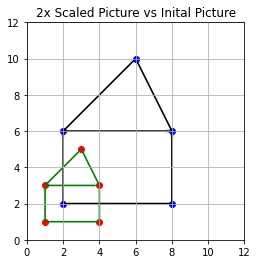

In [ ]:
#Implement the new function in problem 1 w/ comparison of initial
scale = np.array([
                  [2, 0],
                  [0, 2]
])

scaled_picture = initial @ scale

plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")

draw_picture(scaled_picture)
draw_picture(initial, 'red', 'green')

plt.title("2x Scaled Picture vs Inital Picture")
plt.grid()
plt.show()

<h2>Problems 2, 3, 4, and 5:</h2>

**Problem 2:** Rotate the given house into 90 degree of its original position. <br>
**Problem 3:** Rotate the given house into 180 degree of its original position.<br>
**Problem 4:** Rotate the given house into 270 degree of its original position. <br>
**Problem 5:** Rotate the given house into 360 degree of its original position.

In [ ]:
#rotate 90 from original position
rotate_90 = np.array([
                      [0, 1],
                      [-1, 0]
])

#rotate 180 from original position
rotate_180 = np.array([
                       [-1, 0],
                       [0, -1]
])

#rotate 270 from original position
rotate_270 = np.array([
                       [0, -1],
                       [1, 0]
])

#rotate 360 from original position
rotate_360 = np.array([
                       [1, 0],
                       [0, 1]
])

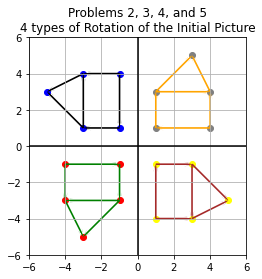

In [ ]:
#Implement the rotations of the initial picture

plt.axis([-6, 6, -6, 6])
plt.gca().set_aspect("equal")

draw_picture(initial @ rotate_90)
draw_picture(initial @ rotate_180, 'red', 'green')
draw_picture(initial @ rotate_270, 'yellow', 'brown')
draw_picture(initial @ rotate_360, 'gray', 'orange')

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.title("Problems 2, 3, 4, and 5\n4 types of Rotation of the Initial Picture")
plt.grid()
plt.show()

<h2>Problem 6:</h2>

Reflect the image of a given point from its original position.

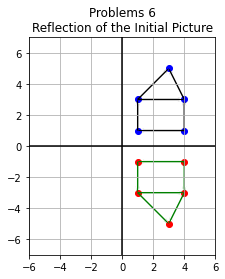

In [ ]:
reflect = np.array([
                    [1, 0],
                    [0, -1]
])

plt.axis([-6, 6, -7, 7])
plt.gca().set_aspect("equal")

draw_picture(initial)
draw_picture(initial @ reflect, 'red', 'green')

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.title("Problems 6\nReflection of the Initial Picture")
plt.grid()
plt.show()

<h1>Second Implementation</h1>

The first implementation attempted to code the results of the researchers using python. It can be observed in the graphs produced by pyplot, and also in the results presented by the researchers, that the transformation is pivot along the origin. This tends to displace the resulting image from its original position.

The second implementation will attempt to produce the same results - but preserving the position of the image with respect to a reference point that can be defined by the user.



<h2>Problem 1: Revised Solution</h2>



In [ ]:
#Problem 1 - Revised Solution

def solution_revised_1(super_array, scale_factor, pivot= 0, offset = (0, 0)):
    pivot_list = []
    offset_list = []
    for i in range(super_array.shape[0]):
        pivot_list.append(list(super_array[pivot]))
        offset_list.append(list(offset))
    matrix_subtrahend = np.array(pivot_list)
    matrix_offset = np.array(offset_list)

    return super_array @ (scale_factor * np.eye(2)) - (scale_factor - 1) * matrix_subtrahend + matrix_offset

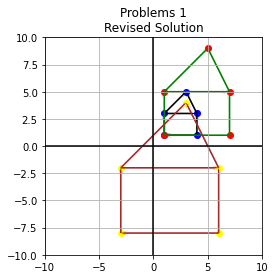

In [ ]:
#Implementation of Problem 1 - Revised Solution

draw_picture(initial)
draw_picture(solution_revised_1(initial, 2, 3), dot_color='red', line_color='green') #scale the initial drawing by 2, pivot at (1, 1)
draw_picture(solution_revised_1(initial, 3, 0, (0, -1)), dot_color='yellow', line_color='brown') #scale the initial drawing by 3, pivot at (3, 5), offset by (0, -1)

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.title("Problems 1\nRevised Solution")
plt.axis([-10, 10, -10, 10])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

In [ ]:
#Problems 2,3,4 and 5 - rotation revised solution

def solution_revised_2(super_array, deg_rotation, pivot=0, offset = (0, 0)):
    pivot_list = []
    offset_list = []
    for i in range(super_array.shape[0]):
        pivot_list.append(list(super_array[pivot]))
        offset_list.append(list(offset))
    matrix_subtrahend = np.array(pivot_list)
    matrix_offset = np.array(offset_list)
    
    rad_rotation = np.radians(deg_rotation)
    rotate = np.array([
                       [np.cos(rad_rotation), np.sin(rad_rotation)],
                       [-np.sin(rad_rotation), np.cos(rad_rotation)]
    ])
    
    #First, put the pivot point in the origin; then rotate the picture; and, bring back to the original position
    return (super_array - matrix_subtrahend) @ rotate + matrix_subtrahend + matrix_offset

<h2>Problems 2, 3, 4 and 5: Revised Solution </h2>

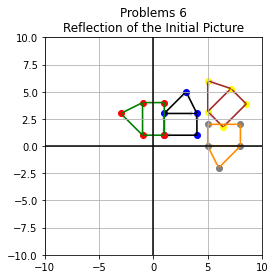

In [ ]:
#Implementation of Problem 2, 3, 4 and 5 - Revised Solution

draw_picture(initial)
draw_picture(solution_revised_2(initial, 90, 3), 'red', 'green') #rotate the initial drawing by 90 degrees, pivot at (1, 1)
draw_picture(solution_revised_2(initial, 45, 0, (2, 1)), 'yellow', 'brown') #rotate the initial drawing by 45 degrees, pivot at (3, 5), offset by (2, 1)
draw_picture(solution_revised_2(initial, 180, 4, (1, 1)), 'gray', 'darkorange') #rotate the initial drawing by 45 degrees, pivot at (3, 5), offset by (1, 1)

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.title("Problems 6\nReflection of the Initial Picture")
plt.axis([-10, 10, -10, 10])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()